In [2]:
from pandas import Series, DataFrame

import pandas as pd

from sklearn import tree
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML 
    
feature_names = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total','spam_flag']
    
class_names = ['non-spam','spam']
    
data=pd.read_csv('spambase.data.txt',header=None,names=feature_names)

data.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [3]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


##### Converting word and character frequency to TFIDF for better feature selection

In [4]:
import math as mt

def tfidf(column):
    nt = len([i for i in column if i > 0])
    if(nt==0):
        return column*0
    else:
        doc_nt = 1+mt.log10(float(len(column))/float(nt))
        return column*doc_nt

word_freq_tfidf = data.iloc[:,0:54].apply(tfidf,axis = 1)

word_freq_tfidf.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.000000,1.138017,1.138017,0.0,0.569008,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.383402,0.000000,0.000000
1,0.280235,0.373647,0.667227,0.0,0.186824,0.373647,0.280235,0.093412,0.0,1.254387,...,0.0,0.0,0.0,0.0,0.0,0.176148,0.0,0.496417,0.240202,0.064054


In [5]:
data_tfidf = pd.concat([word_freq_tfidf,data.iloc[:,54:]],axis=1)
data_tfidf.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
0,0.000000,1.138017,1.138017,0.0,0.569008,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,1.383402,0.000000,0.000000,3.756,61,278,1
1,0.280235,0.373647,0.667227,0.0,0.186824,0.373647,0.280235,0.093412,0.0,1.254387,...,0.0,0.176148,0.0,0.496417,0.240202,0.064054,5.114,101,1028,1


### Model Pre-processing

In [6]:
#Hack to use original data without TFIDF
data_tfidf = data

#Using TFIDF data
features = data_tfidf.iloc[:,0:57]
target = data_tfidf.iloc[:,57:]
target.columns = ['Actual']

n_samples, n_features = data_tfidf.shape

print ('The dimensions of the data set are', n_samples, 'by', n_features)
print ('The classes are : {} for spam and {} for non-spam \n'\
       .format(data_tfidf['spam_flag'].unique()[0],data_tfidf['spam_flag'].unique()[1]))

# Displaying the breakdown of the data into respective classes.
classes = (data_tfidf['spam_flag'].value_counts()/len(data_tfidf['spam_flag']))*100
print ('The breakdown of the class are below :')
print (classes)

('The dimensions of the data set are', 4601, 'by', 58)
The classes are : 1 for spam and 0 for non-spam 

The breakdown of the class are below :
0    60.595523
1    39.404477
Name: spam_flag, dtype: float64


### Evaluation metrics

In [7]:
# importing necessary libraries
from sklearn.metrics import f1_score,matthews_corrcoef,cohen_kappa_score,roc_curve,roc_auc_score,auc
from sklearn.metrics import confusion_matrix,make_scorer
import matplotlib.pyplot as plt
import itertools

# This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
def my_scorer_function(y_test, y_predicted):
    cm = confusion_matrix(y_test, y_predicted)
    return float(cm[0][1]*10 + cm[1][0]*1)/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])    
    
def model_evaluation(model,features,target,class_names,cnf_normalize=False):
    
    my_scorer = make_scorer(my_scorer_function, greater_is_better=False)  

    scores = cross_val_score(model, features, target['Actual'], cv=10, scoring=make_scorer(my_scorer_function))
    
    #predicted_target = DataFrame(model.predict(features))
    #predicted_target.columns = ['Predicted']
    
    #The mean score and the 95% confidence interval of the score estimate are hence given by:
    display(HTML('<br><b><u>Misclassification Cost:</u></b>'))
    print("Cost: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    #Accuracy
    #display(HTML('<br><b><u>Accuracy:</u></b>'))
    #print metrics.accuracy_score(target['Actual'], predicted)    
    

## Decision Tree

In [8]:
# We start with initializing our classifier
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 20,min_samples_leaf =10, random_state =1000)


In [9]:
# Model Evaluation using cross validation
#scores = cross_val_score(model, features, target['Actual'], cv=10)
model_evaluation(clf,features,target,class_names,cnf_normalize=False)

clf = clf.fit(features,target)


Cost: 0.50 (+/- 0.64)


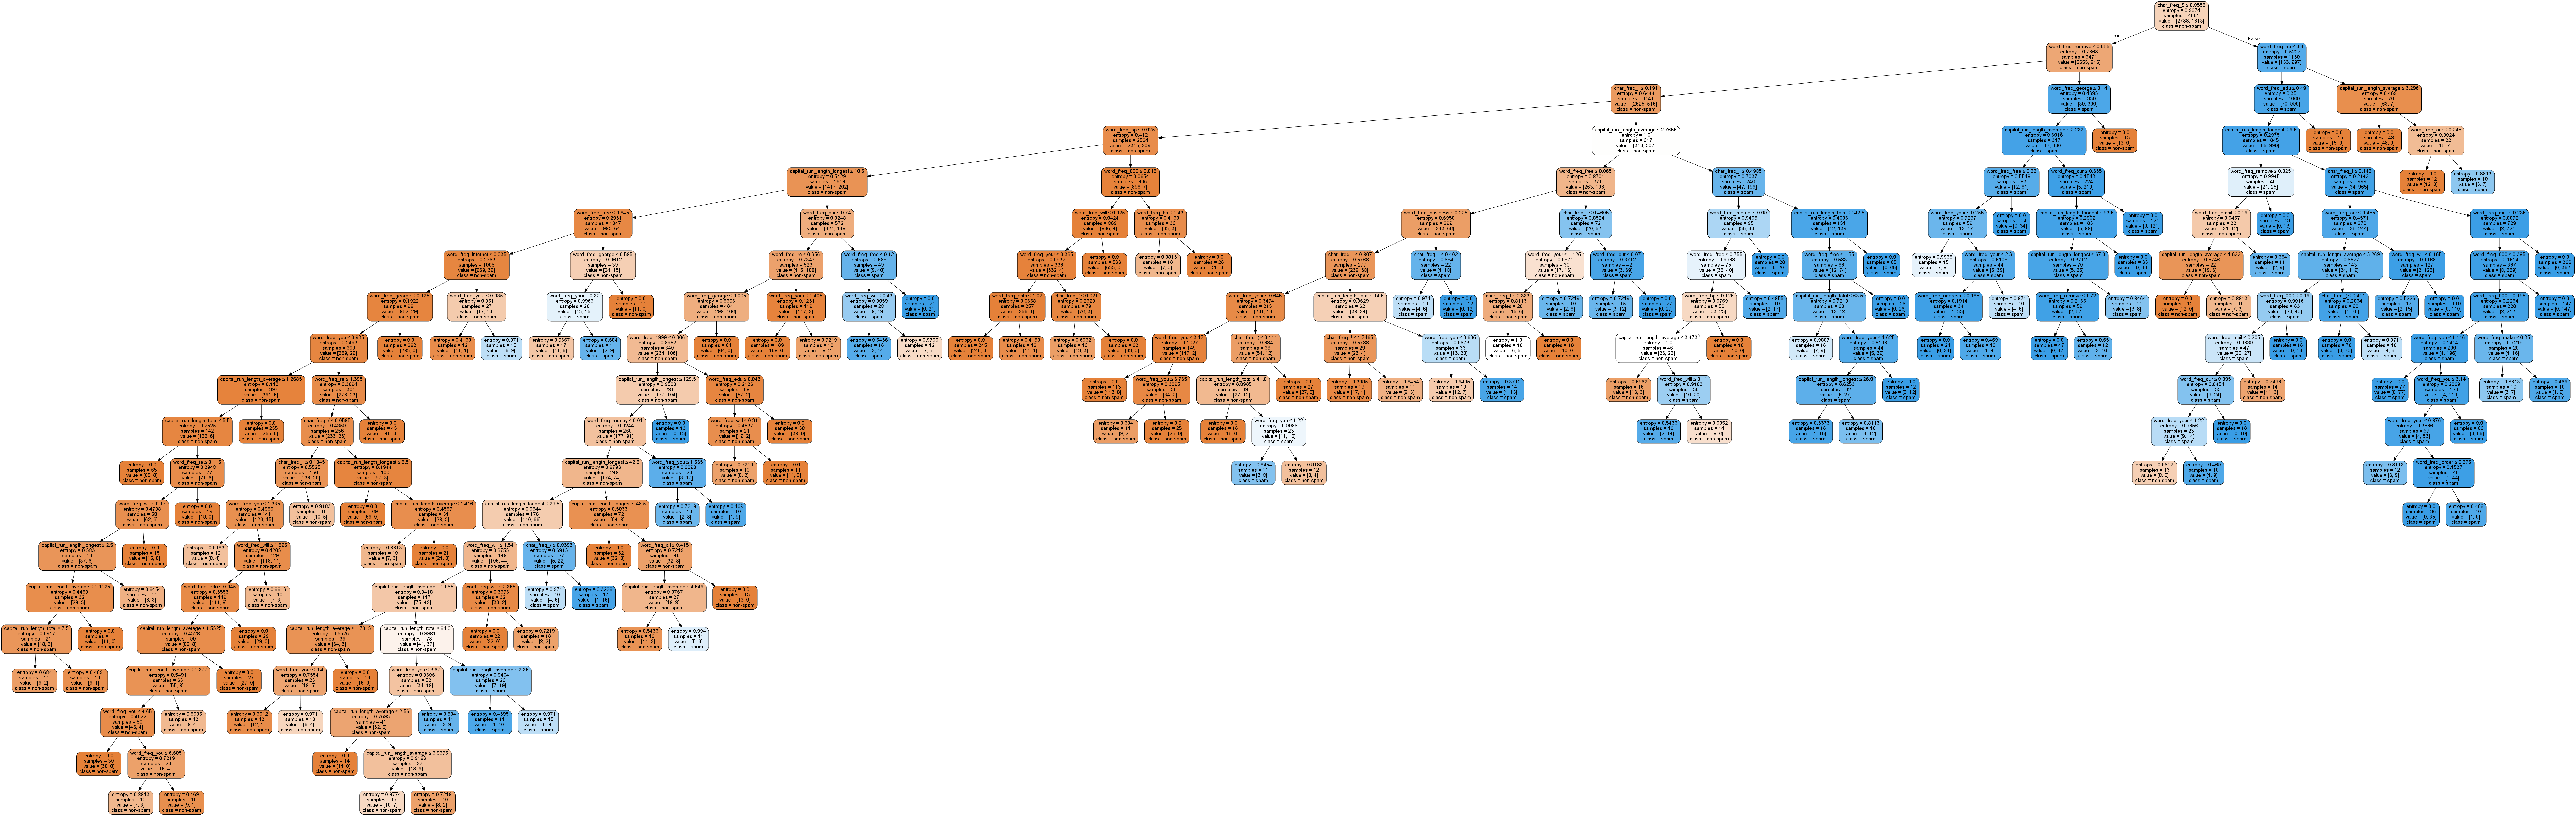

In [10]:
## Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  

#from IPython.display import Image #needed to render in notebook
#Image(graph.create_png())

import os
import graphviz

tree.export_graphviz(clf, out_file=os.getcwd() + os.pathsep + "spam.dot")
with open(os.getcwd() + os.pathsep + "spam.dot") as f:
    dot_graph = f.read()
graphviz.Source(tree.export_graphviz(clf))

# we can store the plot locally as odf
graph.write_pdf(os.getcwd() + os.pathsep + "spam.pdf")
# for png format:
pydot.graph_from_dot_data(dot_data.getvalue())[0].write_png(os.getcwd() + os.pathsep + "spam.png")

# we can also load these files on our notebook
from IPython.display import Image #needed to render in notebook
Image(os.getcwd() + os.pathsep + "spam.png")

## K-Means

In [41]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
features_normal = DataFrame(min_max.fit_transform(data_tfidf.iloc[:,0:57]),columns = feature_names[0:57])
#data_tfidf_normal = pd.concat([data_tfidf.iloc[:,0:54],features_normal],axis=1)
data_tfidf_normal = pd.concat([features_normal,data_tfidf.iloc[:,57:]],axis=1)
data_tfidf_normal.head(5)
# len(data_final)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_flag
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1


### Model Pre-processing

In [42]:
features = data_tfidf_normal.iloc[:,0:57]
target = data_tfidf_normal.iloc[:,57:]
target.columns = ['Actual']

In [43]:
# import necessary libraries and specify that graphs should be plotted inline.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

for n_neighbors in range(3,22,3):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance')
    
    predicted = cross_validation.cross_val_predict(clf, features, target['Actual'], cv=10)

    #Accuracy
    print ("Accuracy for %d-NN is: %0.2f") % (n_neighbors,metrics.accuracy_score(target['Actual'], predicted))
    
    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    #print("Accuracy for %d-NN is: %0.2f (+/- %0.2f)" % (n_neighbors,scores.mean(), scores.std() * 2))
  

Accuracy for 3-NN is: 0.89
Accuracy for 6-NN is: 0.89
Accuracy for 9-NN is: 0.89
Accuracy for 12-NN is: 0.89
Accuracy for 15-NN is: 0.89
Accuracy for 18-NN is: 0.89
Accuracy for 21-NN is: 0.89


In [44]:
# Model Evaluation using the highest accuracy k-values
clf_knn = neighbors.KNeighborsClassifier(6, weights = 'distance')
#clf_knn = clf_knn.fit(features, target)
#scores = cross_val_score(clf_knn, features, target['Actual'], cv=10)
model_evaluation(clf_knn,features,target,class_names,cnf_normalize=False)  

Cost: 0.52 (+/- 0.39)


## Logistic Regression

In [45]:
from sklearn import linear_model
clf_log = linear_model.LogisticRegression(C=1e3, penalty='l2', tol=0.01)
#clf_log = clf_l2_LR.fit(features, target)
#scores = cross_val_score(clf_log, features, target['Actual'], cv=10)
model_evaluation(clf_log,features,target,class_names,cnf_normalize=False) 

Cost: 0.40 (+/- 0.46)


## Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
clf_nb = MultinomialNB()
#clf_nb = GaussianNB()

#scores = cross_val_score(clf_nb, features, target['Actual'], cv=10)
model_evaluation(clf_nb,features,target,class_names,cnf_normalize=False) 

Cost: 0.43 (+/- 0.53)
